<a href="https://colab.research.google.com/github/sjunc/2025-1-BigData-Team/blob/main/analysis/%EB%B0%95%EC%84%B1%EC%A4%80_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
!git clone https://github.com/sjunc/2025-1-BigData-Team

fatal: destination path '2025-1-BigData-Team' already exists and is not an empty directory.


In [124]:
# 파일 읽기
df = pd.read_csv('/content/2025-1-BigData-Team/TitanicData/titanic1309.csv')

### 도시별 나이, 성별 분포

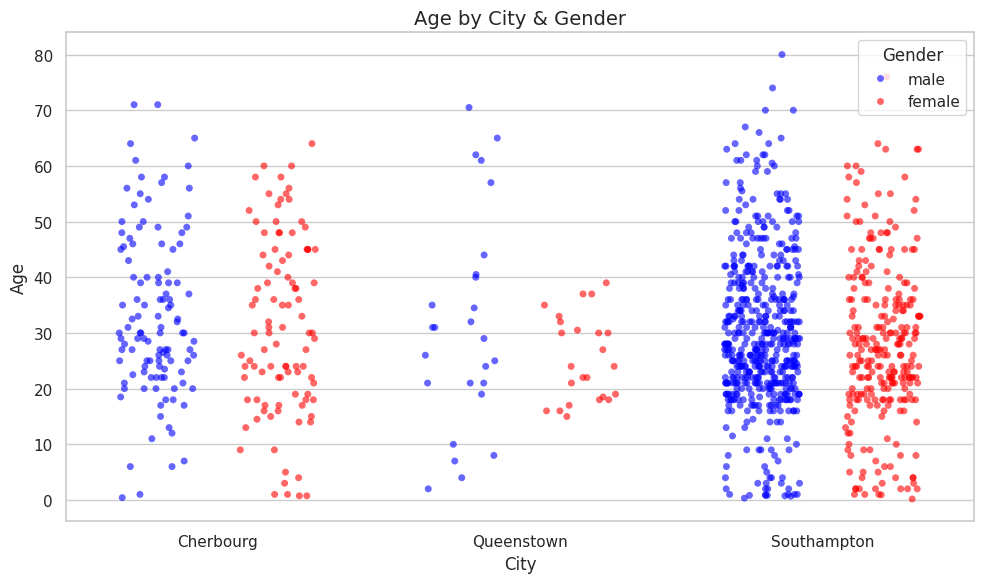

In [125]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Age'].notna() & df['Sex'].notna()]

# 도시 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# X축 도시 순서 고정
city_order = ['Cherbourg', 'Queenstown', 'Southampton']
df['City'] = pd.Categorical(df['City'], categories=city_order, ordered=True)

# 색상 설정
custom_palette = {'male': 'blue', 'female': 'red'}

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 시각화
sns.stripplot(
    data=df,
    x='City',
    y='Age',
    hue='Sex',
    dodge=True,
    jitter=0.25,
    alpha=0.6,
    palette=custom_palette
)

# 축, 제목 설정
plt.title('Age by City & Gender', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

In [126]:
# - Cherbourg: 전체 수에 비해 30 ~ 50대 여성 비중이 상대적으로 높음
# - Queenstown: 10 ~ 30대 젊은 승객 위주 → 이민자층 중심
# - Southampton: 전체적으로 분포 넓음 → 근로자층 다수

### 도시, 성별에 따른 클래스

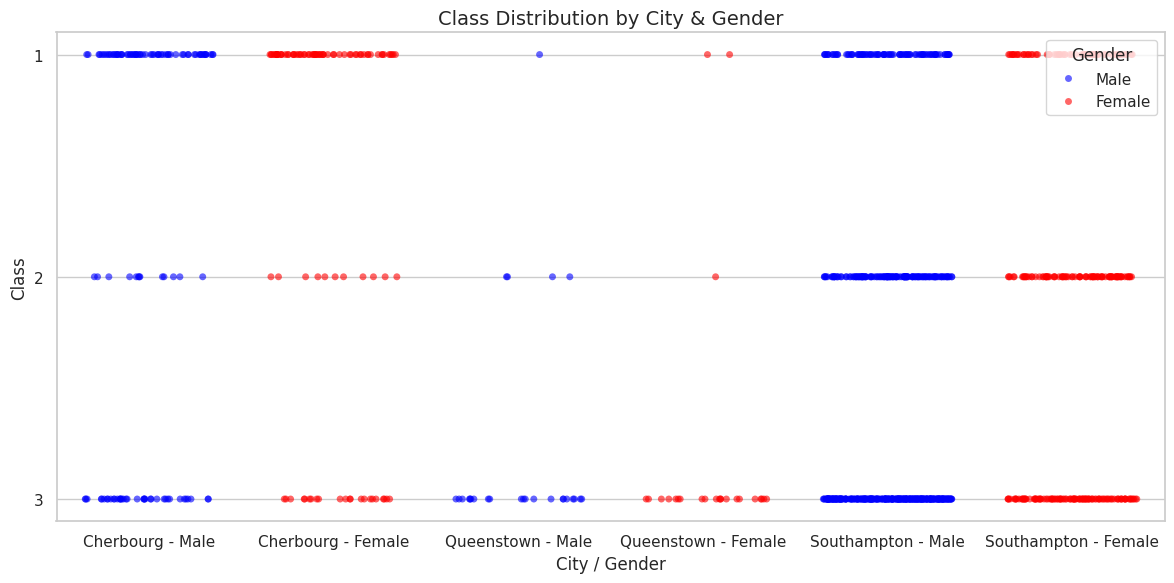

In [127]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Pclass'].notna() & df['Sex'].notna()]

# 클래스 문자열 변환 및 등급 순서 고정
df['Pclass'] = df['Pclass'].astype(int).astype(str)
pclass_order = ['1', '2', '3']
df['Pclass'] = pd.Categorical(df['Pclass'], categories=pclass_order, ordered=True)

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# X축 순서 고정(도시, 성별 순)
ordered_categories = [
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female',
    'Southampton - Male', 'Southampton - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='Pclass',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.35,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Class Distribution by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Class", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [128]:
# - Cherbourg - Female: 1등급 비중 높음 → 상류층 다수
# - Queenstown - Male: 3등급 밀집 → 저가 승객
# - Southampton - Male: 전 등급 고르게 분포 → 다양한 계층, 대규모 탑승

### 도시, 성별에 따른 요금

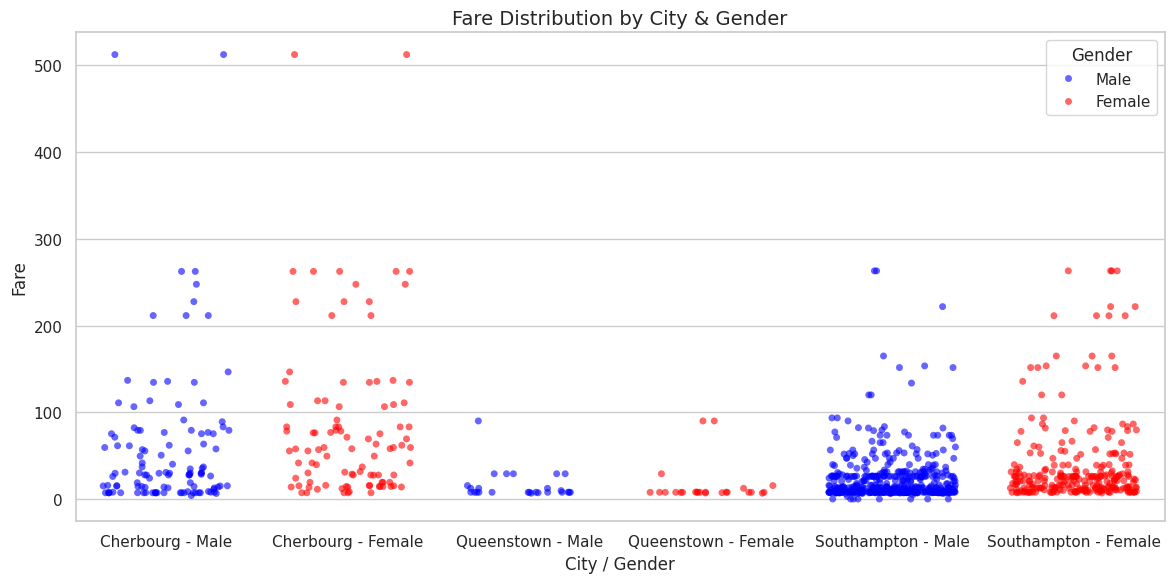

In [135]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Fare'].notna() & df['Sex'].notna()]

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# X축 순서 고정
ordered_categories = [
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female',
    'Southampton - Male', 'Southampton - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='Fare',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.35,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Fare Distribution by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [130]:
# - Cherbourg - Female: 전체 수에 비해 높은 요금 승객 많음 → 1등석 승객 다수로 추정
# - Queenstown - Male: 매우 낮은 요금 다수 → 3등급 밀집과 관련
# - Southampton - Male: 요금 분포가 넓지만 낮은 요금이 많음 → 저가 탑승자 다수

### 도시, 성별에 따른 가족구성원 수(본인 제외)

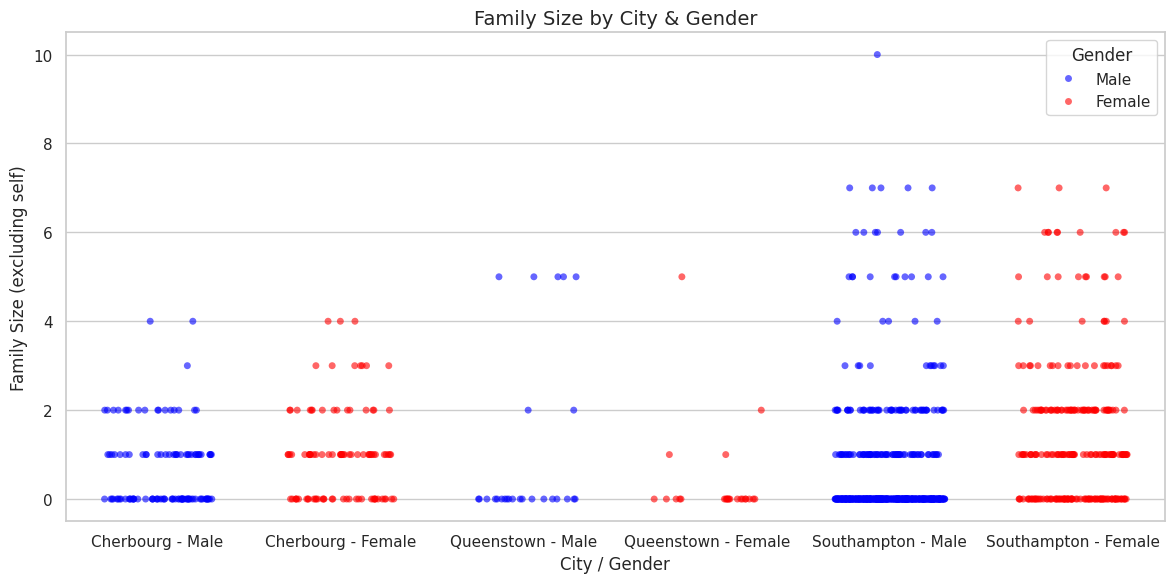

In [131]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Sex'].notna() & df['SibSp'].notna() & df['Parch'].notna()]

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# 가족 수 계산 (본인 제외)
df['FamilySize'] = df['SibSp'] + df['Parch']

# X축 순서 고정
ordered_categories = [
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female',
    'Southampton - Male', 'Southampton - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='FamilySize',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.3,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Family Size by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Family Size (excluding self)", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [132]:
# - Cherbourg : 가족 동반 탑승 비율 높음 → 상류층의 가족 여행 추정
# - Queenstown : 가족 수 대부분 0 → 단독 탑승 많고 이민 목적일 가능성
# - Southampton : 가족 동반 수가 많은 것도 일부 있지만 단독 탑승자도 많음 → 여러 목적으로 탑승

### 도시별 요금에 따른 클래스

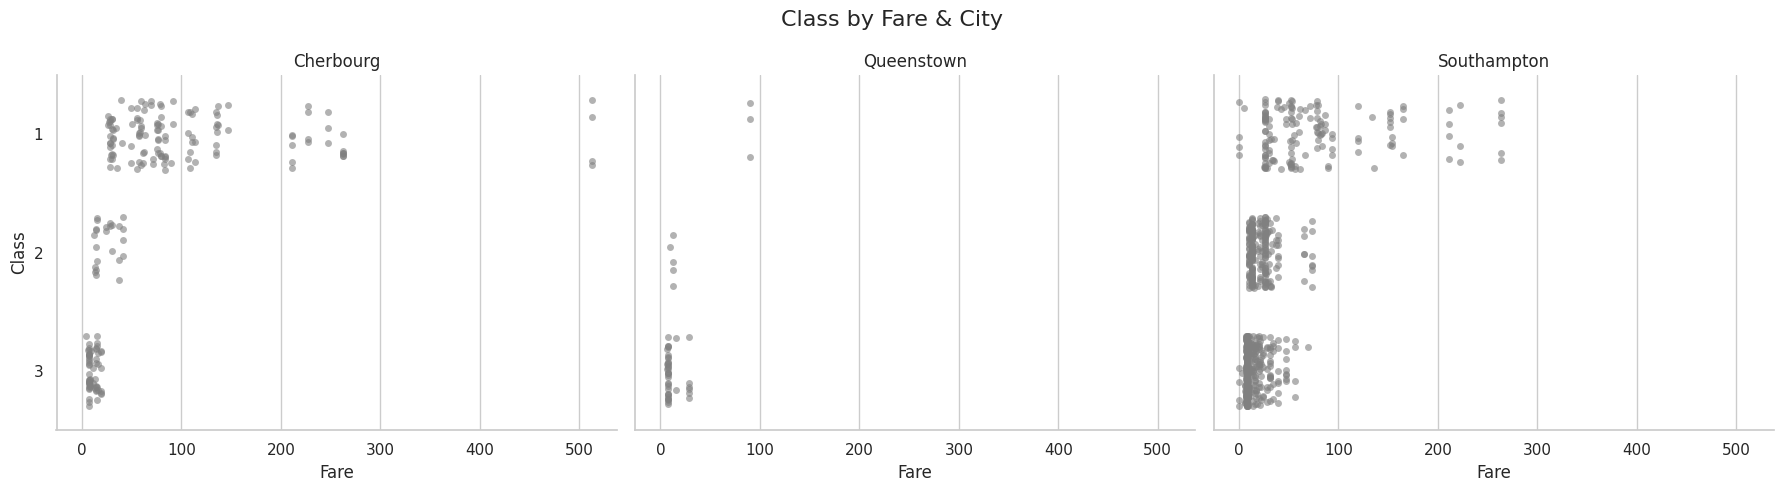

In [133]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Sex'].notna() & df['SibSp'].notna() & df['Parch'].notna()]

# 도시 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# 순서 고정
pclass_order = ['1', '2', '3']
df['Pclass'] = df['Pclass'].astype(int).astype(str)
df['Pclass'] = pd.Categorical(df['Pclass'], categories=pclass_order, ordered=True)

# 도시별 스캐터
g = sns.FacetGrid(
    df,
    col='City',
    col_order=['Cherbourg', 'Queenstown', 'Southampton'],
    height=5,
    aspect=1.2
)

# 시각화
g.map_dataframe(
    sns.stripplot,
    x='Fare',
    y='Pclass',
    dodge=True,
    jitter=0.3,
    alpha=0.6,
    color='gray'
)

# 축 설정
g.set_axis_labels("Fare", "Class")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Class by Fare & City", fontsize=16)

# 그래프 출력
plt.show()

In [134]:
# 도시마다 가격과 등급에 관계는 차이가 딱히 없음
# 1등급으로 갈수록 가격이 제한 없이 증가하며 2, 3등급은 가격 차이가 크지 않음
# 하지만 Southampton의 경우엔 인원이 많아 3등급 좌석을 1등급보다 비싸게 탑승한 경우도 있음